In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import statistics
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [65]:
data=pd.read_csv(r'C:\Users\guzel\Desktop\airbnb_NYC\listings.csv')

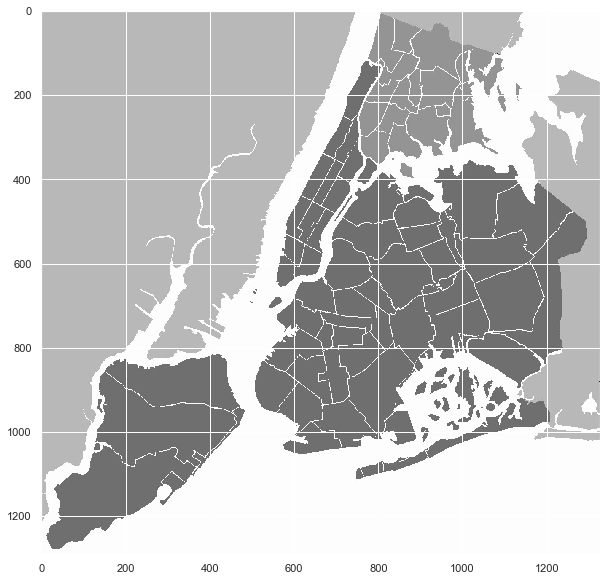

In [66]:
img=mpimg.imread('New_York_City_.png',0) 
plt.imshow(img)

In [67]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50594,40570168,"Happy, accommodating,confortable & súper CLEAN!",314364722,Archi,Bronx,Fordham,40.86173,-73.89413,Entire home/apt,200,1,0,NaN,NaN,2,355
50595,40570350,Cozy Modern Cottage Apartment,61835657,Hugo,Queens,Ditmars Steinway,40.77645,-73.90754,Entire home/apt,150,3,0,NaN,NaN,1,37
50596,40570935,"Súper clean, super confortable,súper ACCOMMODA...",314364722,Archi,Bronx,Fordham,40.86239,-73.89468,Entire home/apt,225,1,0,NaN,NaN,2,167
50597,40572303,Captivating Room C,219544415,Joel And Julian,Brooklyn,Bedford-Stuyvesant,40.69313,-73.95031,Private room,70,2,0,NaN,NaN,3,354


In [68]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [69]:
data.drop(['host_name'], axis=1, inplace=True)

In [70]:
data.isnull().sum()

id                                    0
name                                 17
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10220
reviews_per_month                 10220
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [71]:
data.fillna({'name':0}, inplace=True)
data.fillna({'last_review':0}, inplace=True)
data.fillna({'reviews_per_month':0}, inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Detect Outliers and Ignore Them

In [72]:
print(len(data.price))
print(data.price.median())
print(data.price.mean())
print(len(data.price[data.price > data.price.std()]))
print(data.price.std())

50599
105.0
158.17178205102869
2908
348.08956197119085


# Attempts for figure out the anomalies:

In [73]:
min_p = min(data.price)
max_p = max(data.price)
print('Min price per night: {}, Max price per night: {} '.format(min_p,max_p))

Min price per night: 0, Max price per night: 10000 


In [74]:
print(data.shape[0])
print(len(data.loc[data.price > 0, 'price']))

50599
50583


### I am going to remove these 16 listings whose price is 0

In [75]:
# Clean all 0 prices and check the new min price.

data = data[data.price != 0]
print(data.price.min())

10


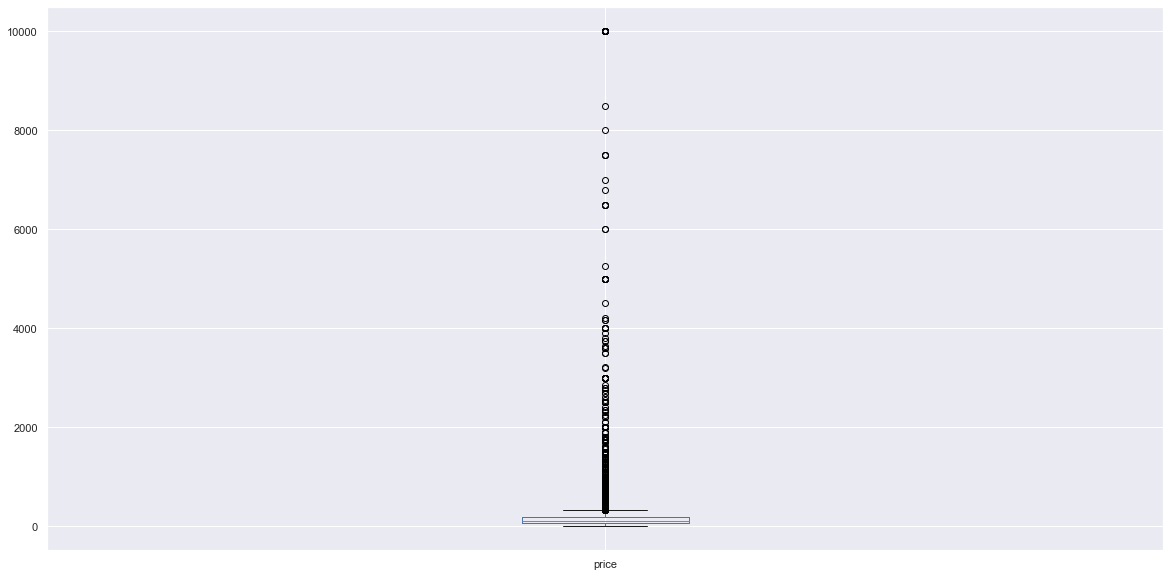

In [76]:
data.price.plot(kind='box')
plt.show()

# Even if we got rid of 0 prices, the boxplot above is still squished. Thus I created 2nd boxplot below by limiting the price range to get rid of the extreme outliers. 

In [77]:
desc = data.price.describe()
print(desc)
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data.price[data.price < lower_bound]
print("Outliers: ",data.price[(data.price < lower_bound) | (data.price > upper_bound)].values)

count    50583.000000
mean       158.221814
std        348.133242
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
Anything outside this range is an outlier: ( -90.0 , 334.0 )
Outliers:  [ 375 2000  500 ... 1000 1000  500]


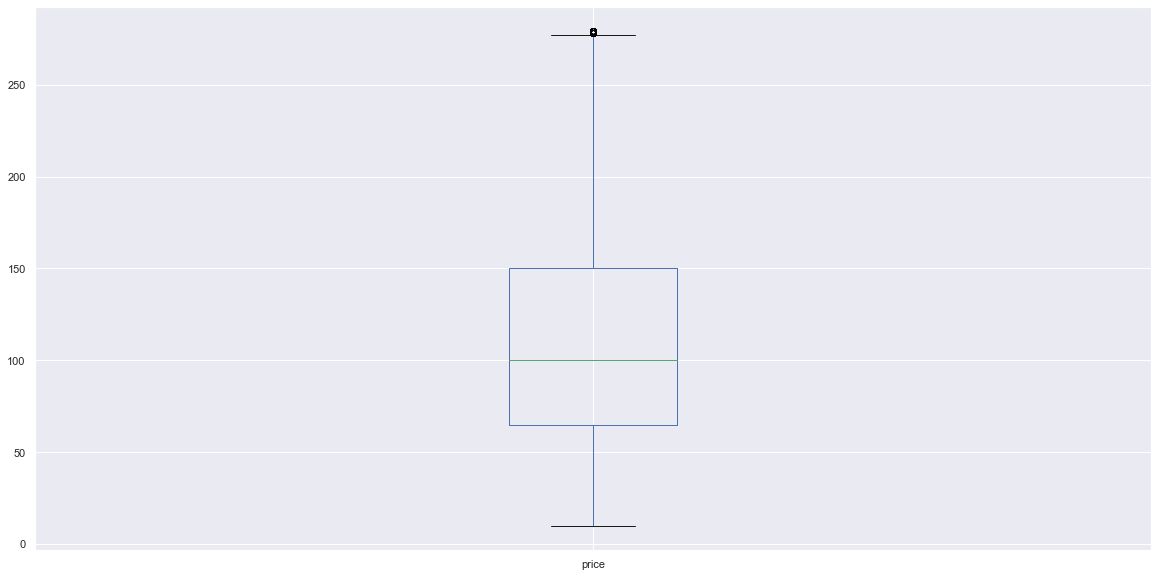

In [78]:
data.price[data.price< 280].plot(kind='box')
plt.show()

In [79]:
# I have created new Series by filtering price column from outleirs in sake of the codes below.
price_new = data.price[data.price < 280]

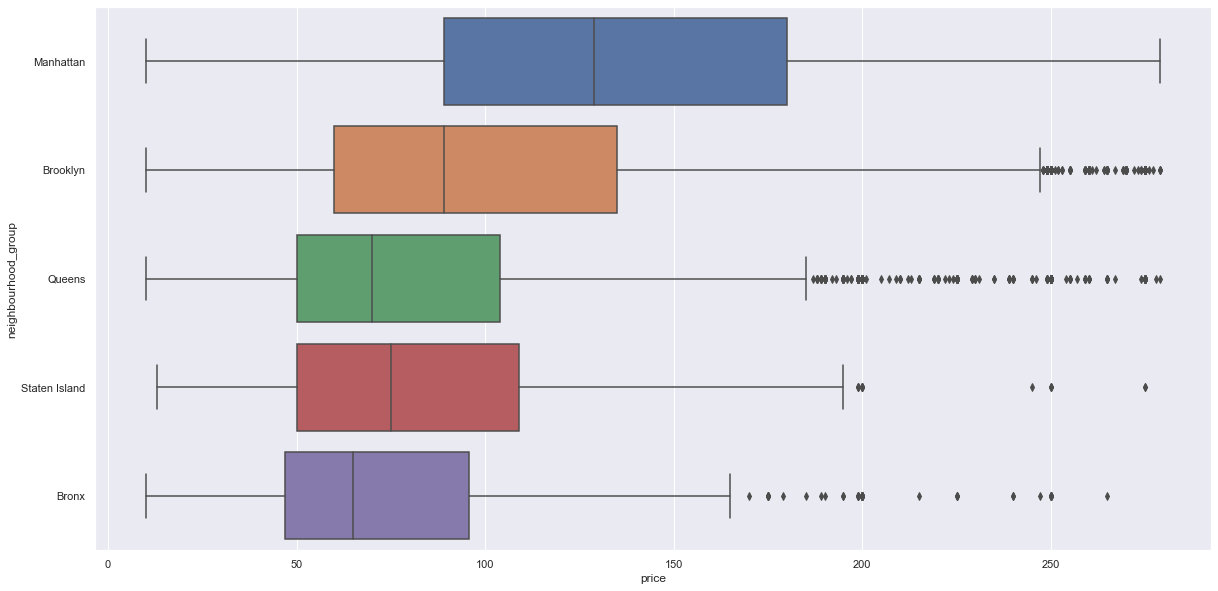

In [80]:
sns.boxplot(x=price_new, y=data.neighbourhood_group)

In [81]:
def find_anomalies():
    # Set upper and lower limit to 3 standard deviation
    price_std = data.price.std()
    price_mean = data.price.mean()
    cut_off = price_std * 3
    
    lower = price_mean - cut_off 
    upper = price_mean + cut_off

    price_anomalies = []    

    # Generate outliers
    for outlier in data.price:
        if outlier > upper or outlier < lower or outlier == 0:
            price_anomalies.append(outlier)
    return price_anomalies

# The solutions above based on ignoring the outliers, work well to analyze data. 

# Nevertheless,  instead of looking at high values as outliers, I would consider a log transformation of price to not lost any possible important data.

# Thanks to the log transform, the data are not very skewed, so I do not have to remove the high values:

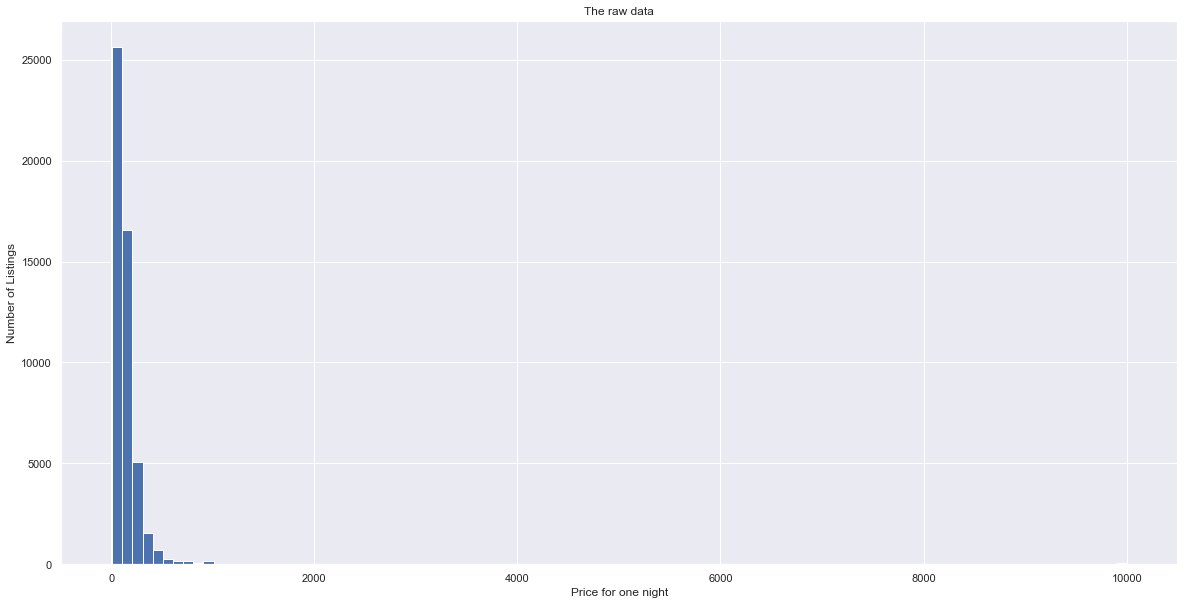

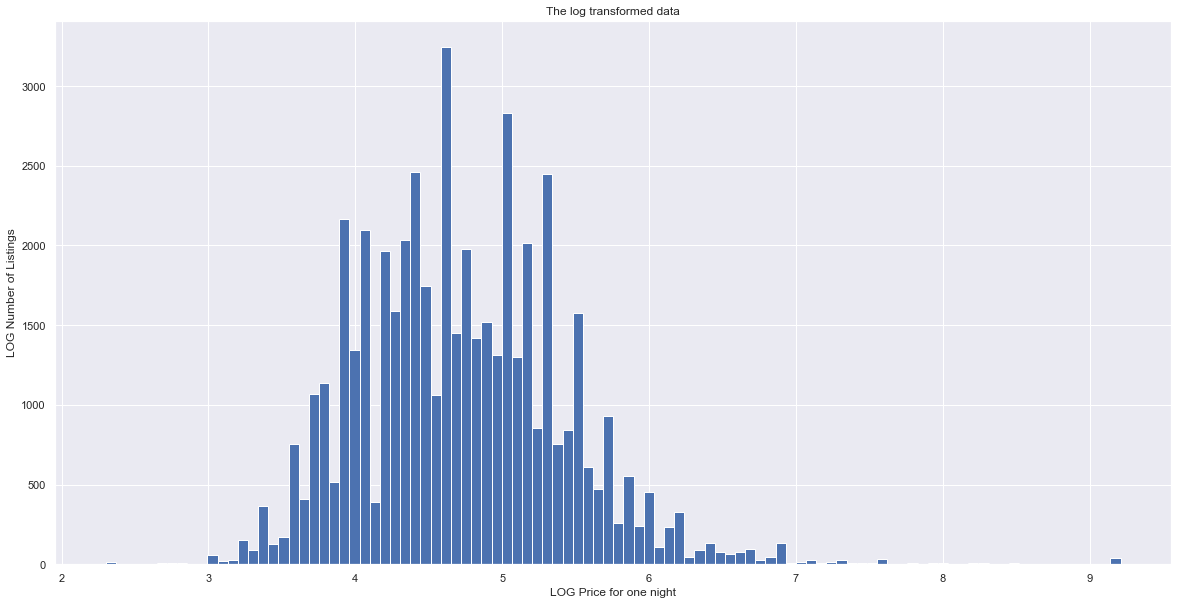

In [82]:
#Raw data
fig, ax = plt.subplots()
ax.hist(data.price, bins = 100)
plt.xlabel('Price for one night')
plt.ylabel('Number of Listings')
plt.title('The raw data')
plt.show()

#logged data
fig, ax = plt.subplots()
logged_data = np.log(data.loc[data.price > 0, 'price'])
ax.hist(logged_data, bins = 100)
plt.xlabel('LOG Price for one night')
plt.ylabel('LOG Number of Listings')
plt.title('The log transformed data')
plt.show()







# DATA EXPLORING AND VISUALIZATION




## How can we categorise listing prices as High, Medium or Low?

To create this chart, initially I set the lower bound as $ 75, and the higher bound as $ 500 for one night hosting price in NYC.


In [83]:
def rank_price(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'

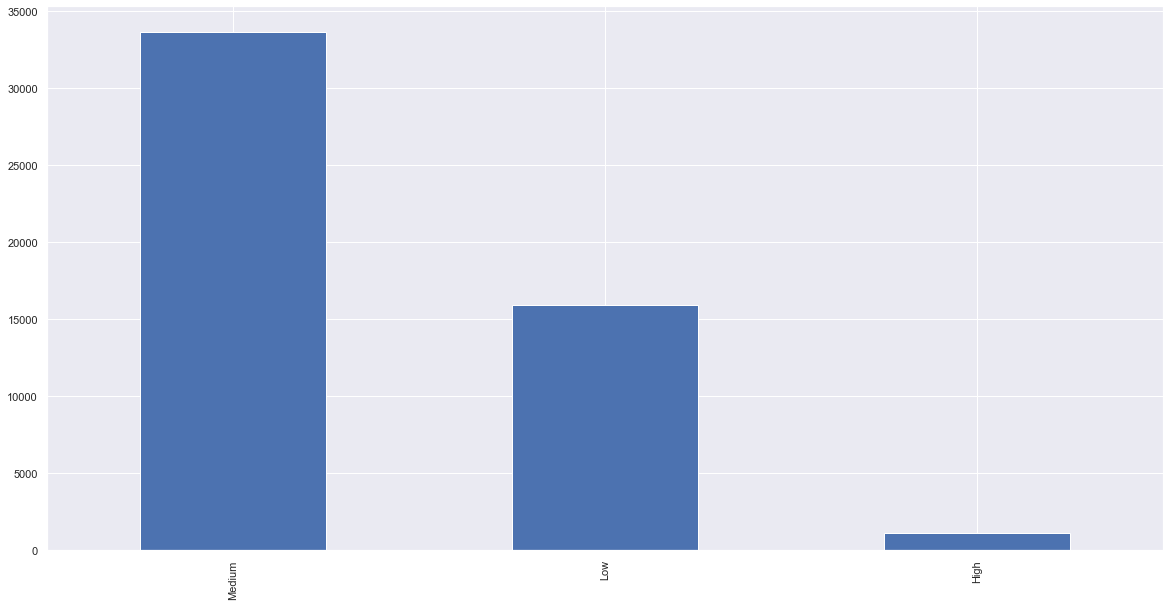

In [84]:
data.price.apply(rank_price).value_counts().plot(kind='bar')

### The result:
Shows that around 325000 listing is in the medium category while aroun 15000 listing is priced lower and 1000 listing is higher.

### Let's see this distinction on the base of boroughs.

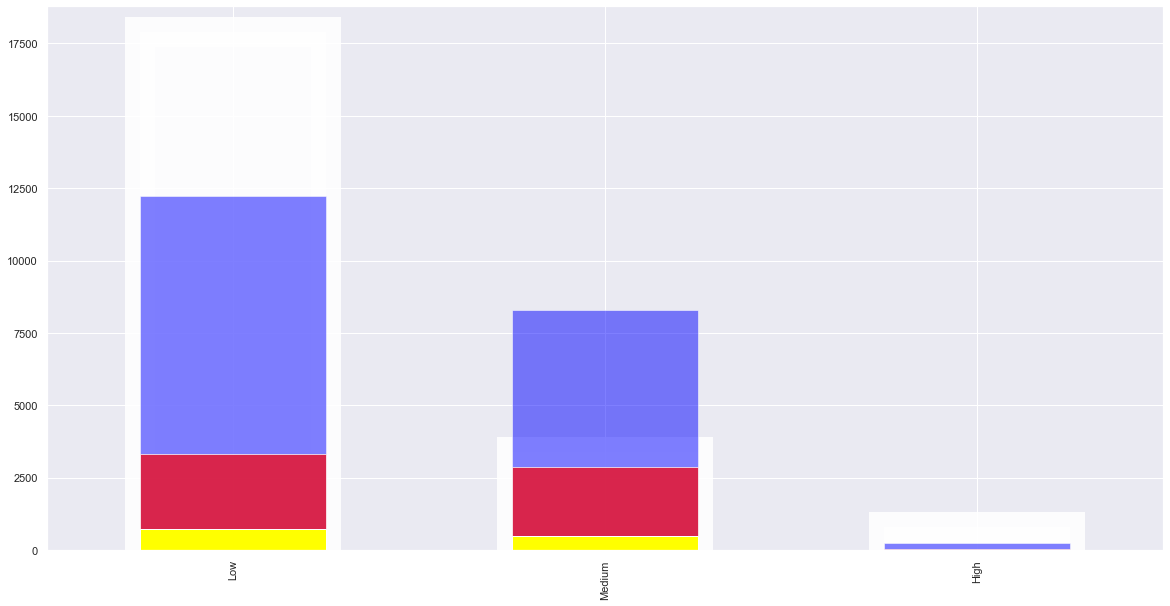

In [85]:
data.loc[data['neighbourhood_group'] == 'Manhattan'].price.apply(rank_price).value_counts().plot(kind='bar', color='white', alpha=0.9, lw=30)
data.loc[data['neighbourhood_group'] == 'Brooklyn'].price.apply(rank_price).value_counts().plot(kind='bar', color='blue', alpha=0.5)
data.loc[data['neighbourhood_group'] == 'Queens'].price.apply(rank_price).value_counts().plot(kind='bar', color='red', alpha=0.7)
data.loc[data['neighbourhood_group'] == 'Staten Island'].price.apply(rank_price).value_counts().plot(kind='bar', color='black')
data.loc[data['neighbourhood_group'] == 'Bronx'].price.apply(rank_price).value_counts().plot(kind='bar', color='yellow')

### The result:

Manhattan has quantitatively the most listings in the categories of 'Low' and 'High'.
<br> Brooklyn follows Manhattan by having the most listings in the category of 'Medium'.
<br> Manhattan and Brooklyn are the only boroughs who has listings in the category of 'High'.
<br> Staten Island has very low quantitiy of listings thus black color is not visible on this chart.
<br> Bronx has a few and same amount of listings in the categories of 'Low' and 'Medium'.

<br>
<br>

# What is the correlation between each categories?

<br>
To create this, I am going to use sns.heatmap.
<br>

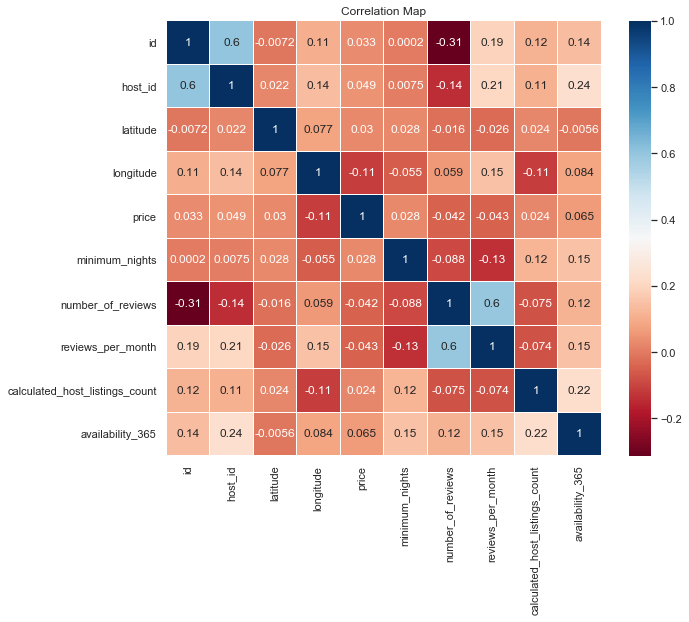

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

### The Result:

There is no strong correlation bewteen this categories apart from the link between 'number_of_reviews' and 'reviews_per_month'. 
<br>However this link is also understably logical because the more reviews, the more reviews per month.
<br>
<br>Thus, overall, all correlation between column categories are weak.

# What are the top words used in Airbnb listings?

To answer this question, I am going to use WordCloud.

In [87]:
import csv
from wordcloud import WordCloud

word_list = []
word_list= '\t'.join([str(i) for i in data.name])

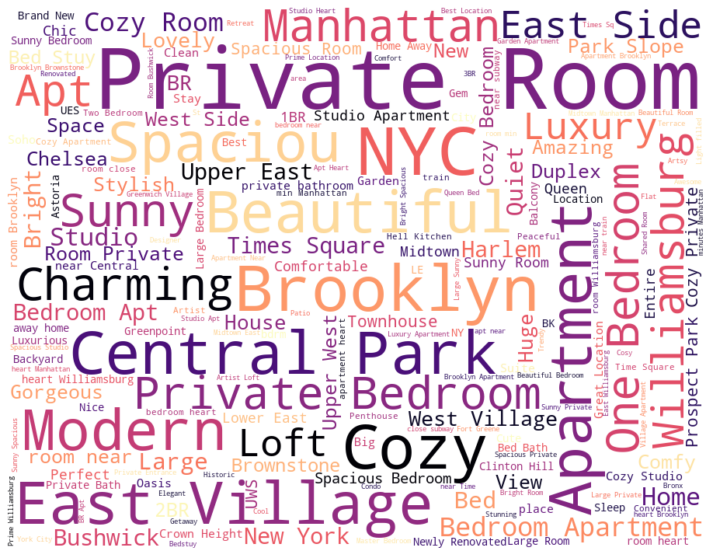

In [88]:
wordcloud = WordCloud(width=900, height=700, background_color="white", colormap="magma").generate(word_list)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### The Result:

According to this WordMap, 'Private Room', 'Apartment', and 'NYC' are the top 3 words used in listing title on AirBNB.

# What is the avarage price per night in NYC?


First, I simply calculated the mean of all listing prices.

Secondly, I calculated the avarege price according to top reviewed listings to eliminate unpopular/inactivated listings.

Thirdly, I calculated the avarege price according to cleaned data from outliers.


In [89]:
price_avrg = data.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 158.22181365280827


In [90]:
top_reviewed_listings = data.nlargest(100,'number_of_reviews')
price_avrg = top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 94.52


In [91]:
filtered_price_avg = price_new.mean()
print('Average price per night: {}'.format(filtered_price_avg))

Average price per night: 113.54639354600214


# How do prices of listings vary by location?

Let's calculate the price disperse according to 5 boroughs: 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'.

1) To do this, first I divided the data into 5 sub data. Then I used sns.stripplot.

2) Because of these sub-data groups have outliers, I used the price_new data to see closely the disperse via sns.violinplot.

3) Not to lose extra expensively priced listings, I also used logged_data with sns.barplot.

In [92]:
data.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [93]:
sub_1= data.loc[data['neighbourhood_group'] == 'Manhattan']
sub_2= data.loc[data['neighbourhood_group'] == 'Brooklyn']
sub_3= data.loc[data['neighbourhood_group'] == 'Queens']
sub_4= data.loc[data['neighbourhood_group'] == 'Staten Island']
sub_5= data.loc[data['neighbourhood_group'] == 'Bronx']

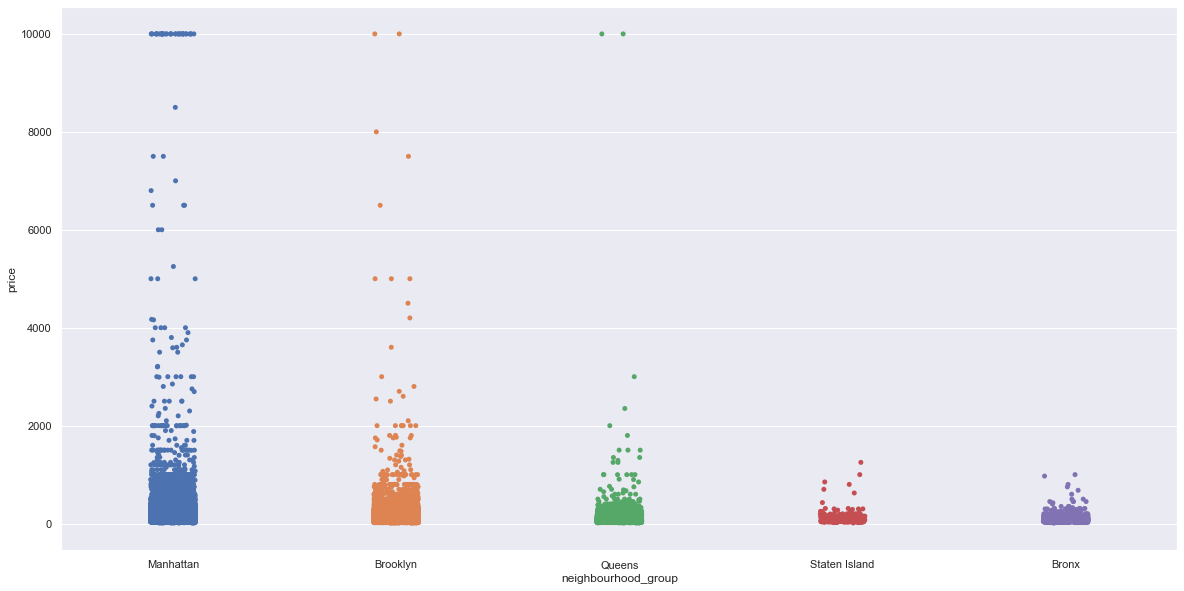

In [94]:
sns.stripplot(x=data.neighbourhood_group, y=data.price)

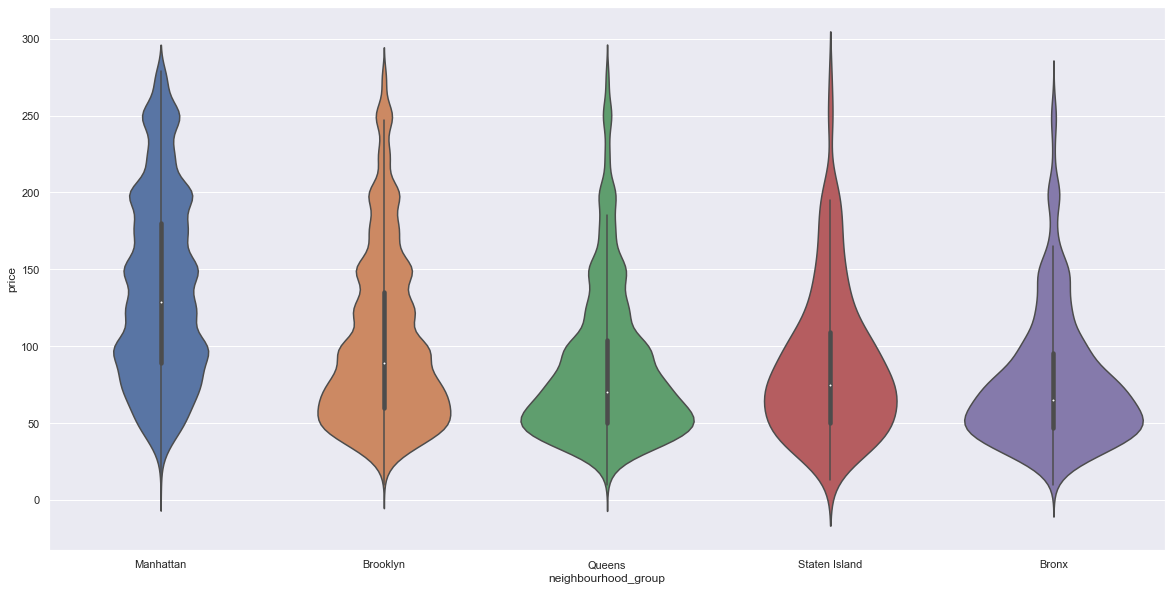

In [95]:
# There are a lot of outliers above, I am going to go with filtered price.
sns.violinplot(x=data.neighbourhood_group, y=price_new)

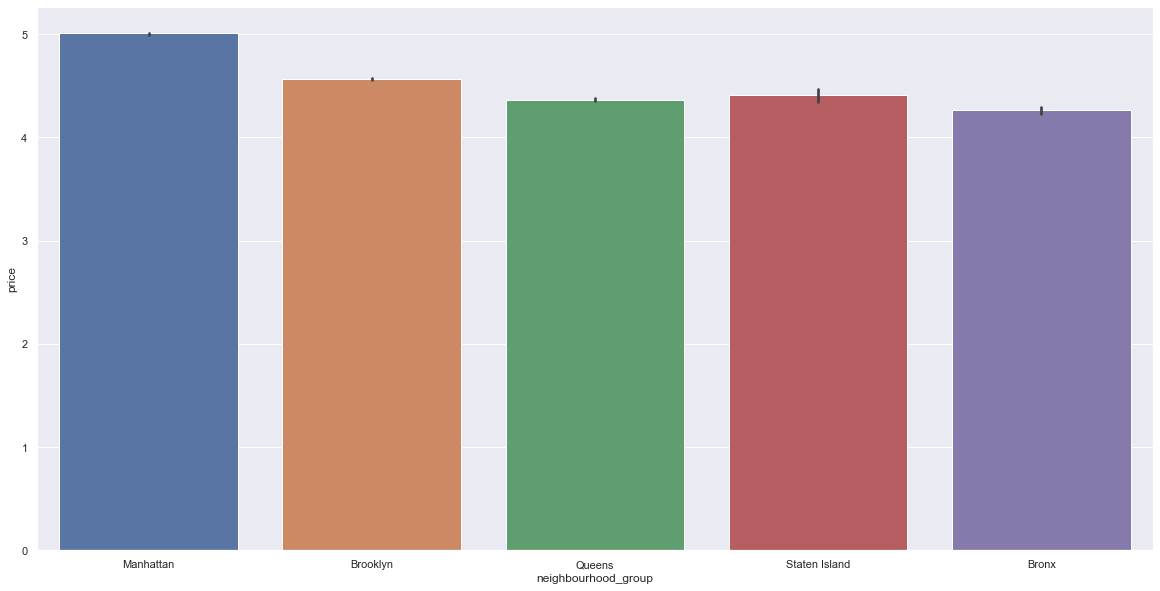

In [96]:
#logged data
sns.barplot(x=data.neighbourhood_group, y=logged_data)

# What is the disperse of room types related to boroughs?

1) First I examined the types of rooms.

2) Then, sub-data groups are created according to boroughs' sub-data created in previous question's answer.

3) A data frame created to see the amount of listings according to arranged distrubution above.

4) A plot is created to visualize this dataset.

5) This is a shortcut. In just one step, you can analyze all data reached above in 4 steps thanks to sns.countplot.

In [97]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [98]:
# Room type distribution
room1 = sub_1['room_type'].value_counts()
room2 = sub_2['room_type'].value_counts()
room3 = sub_3['room_type'].value_counts()
room4 = sub_4['room_type'].value_counts()
room5 = sub_5['room_type'].value_counts()
room = pd.DataFrame([room1,room2,room3,room4,room5],index=['Manhattan','Brooklyn','Queens','Staten Island','Bronx'])
room.head()

,Entire home/apt,Private room,Shared room,Hotel room
Manhattan,13381.0,7877.0,470.0,337.0
Brooklyn,9863.0,10326.0,497.0,43.0
Queens,2264.0,3679.0,216.0,37.0
Staten Island,194.0,179.0,5.0,NaN
Bronx,431.0,718.0,66.0,NaN


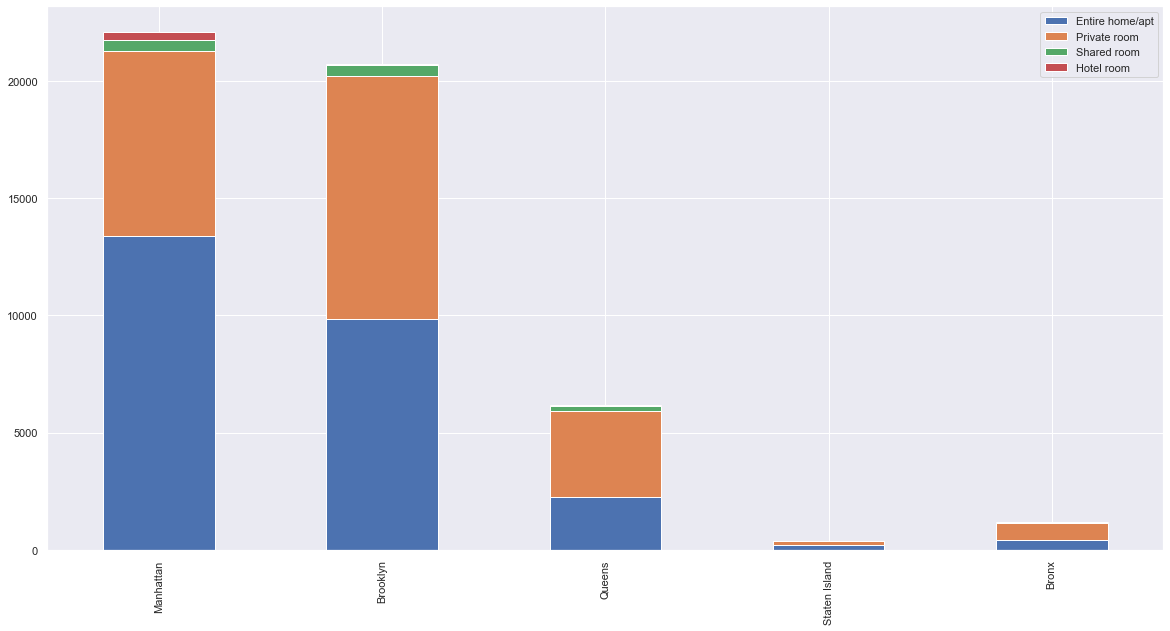

In [99]:
room.plot(kind='bar',stacked=True)

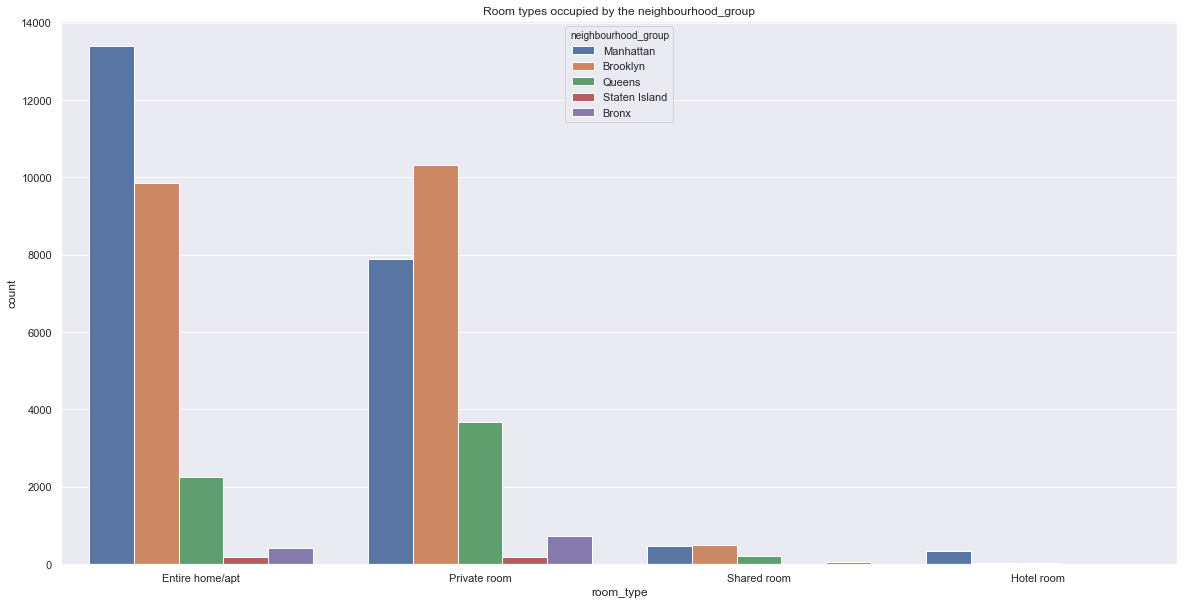

In [100]:
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

# The Results:

Hotels are listed on AirBNB mostly for Manhattan which has also the most amount of Entire home-Apt listings.
Brooklyn's listings are generally based on Private Room.
While shared rooms and hotel rooms are the least popular listings, entire room and private rooms listings significantly have higher demand.


# What is the disturbution of room types according to longtitude and latitude?


I used sns.scatterplot to see the answer.

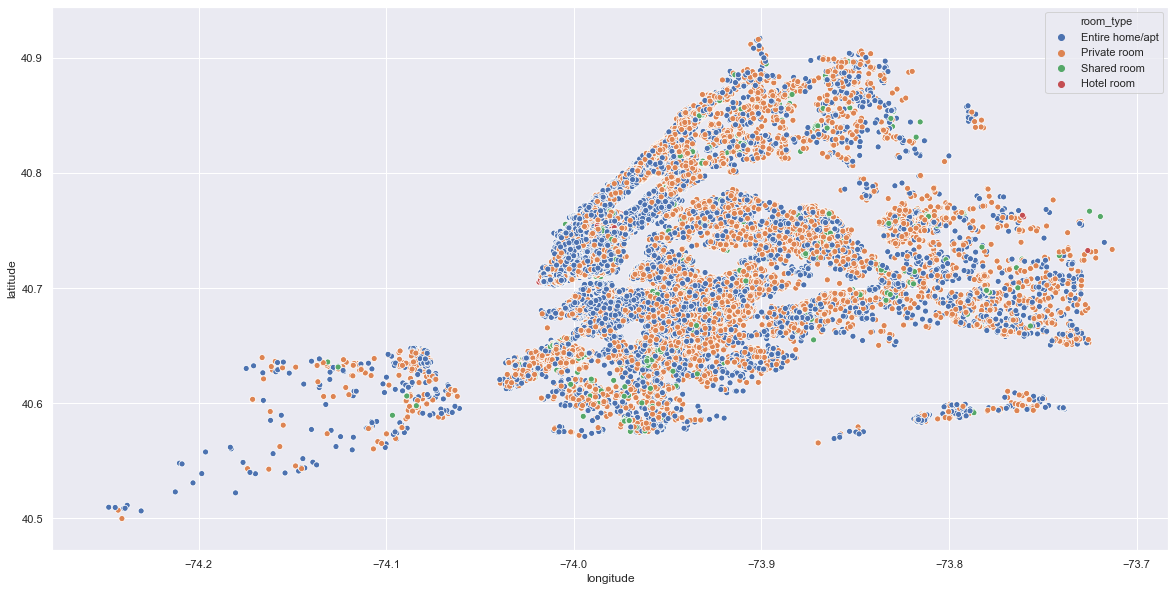

In [101]:
sns.scatterplot(data.longitude, data.latitude, hue=data.room_type )
plt.ioff()

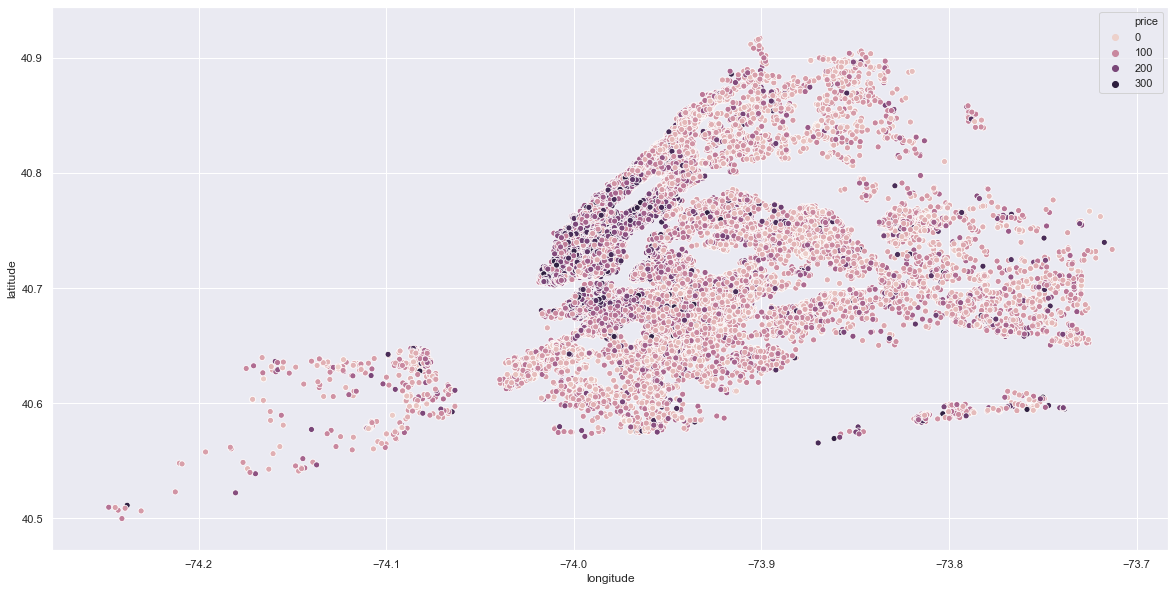

In [102]:
sns.scatterplot(data.longitude, data.latitude, hue=price_new)
plt.ioff()

# The map above is so ambigue, I am going to check borough by borough:

# Manhattan Price Map

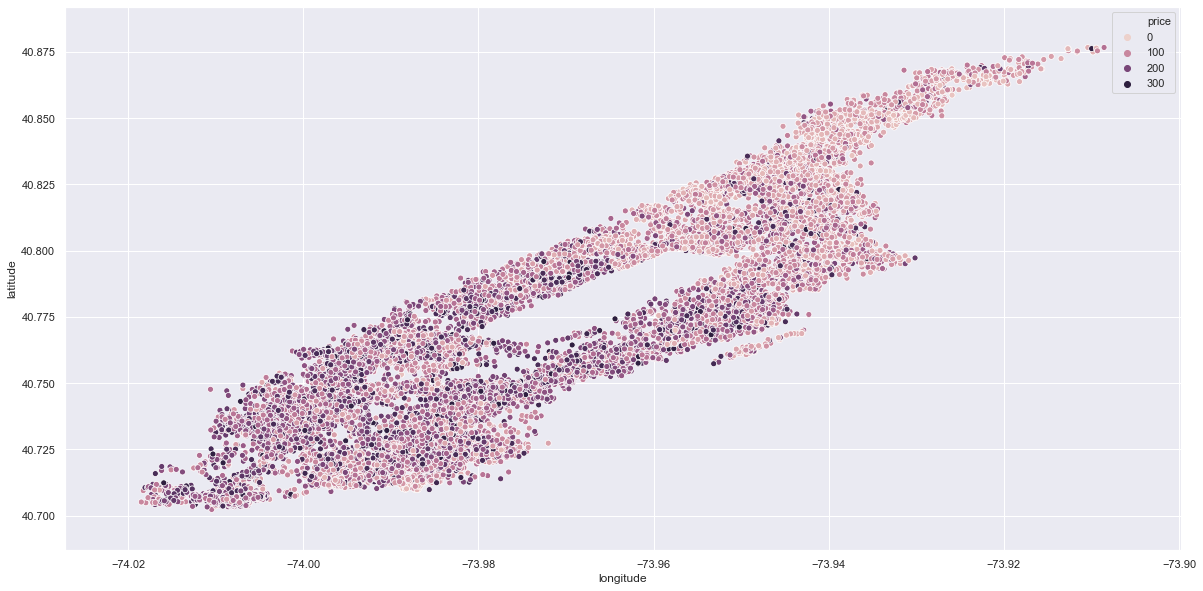

In [103]:
sns.scatterplot(sub_1.longitude, sub_1.latitude, hue=price_new)
plt.ioff()

## The gap above is Central Park.
## The latitude of Central Park, New York, NY, USA is 40.785091, and the longitude is -73.968285


### I wished to find out "How prices vary according to distance from 'Central Park'?" but couldn't filtered.

# Brooklyn Price Map

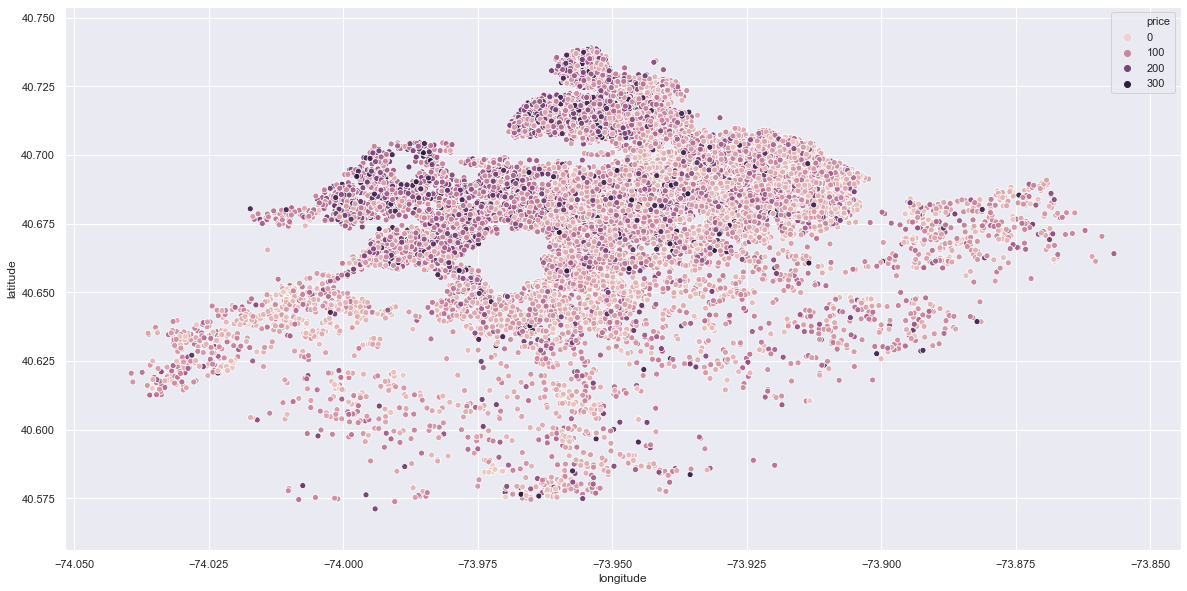

In [104]:
sns.scatterplot(sub_2.longitude, sub_2.latitude, hue=price_new)
plt.ioff()

# Queens Price Map

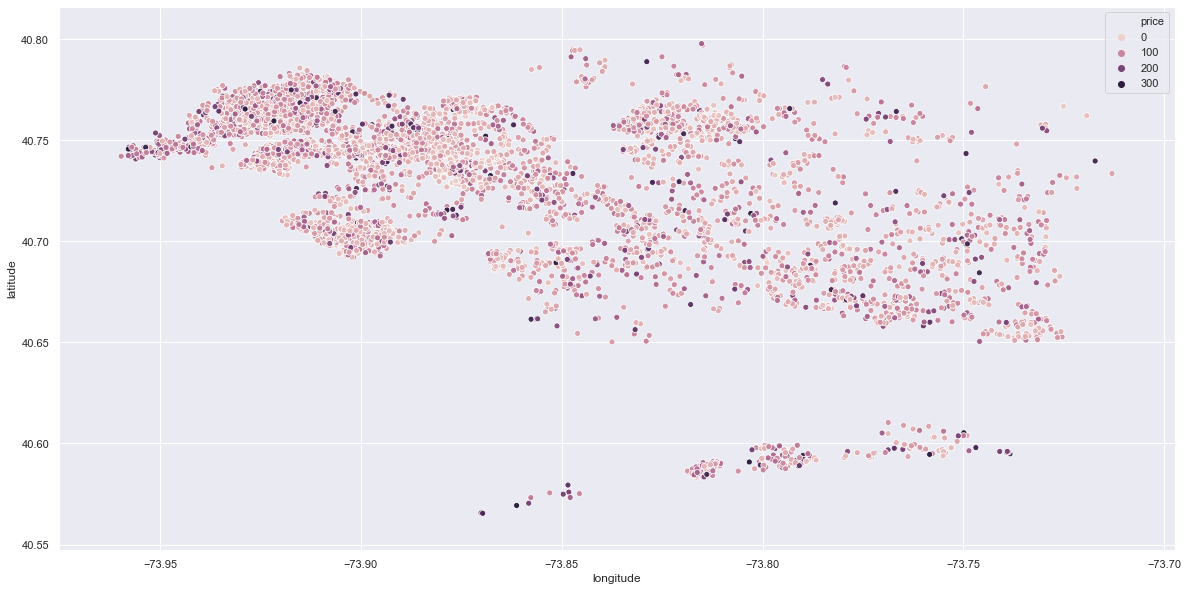

In [105]:
sns.scatterplot(sub_3.longitude, sub_3.latitude, hue=price_new)
plt.ioff()

# Staten Island Price Map

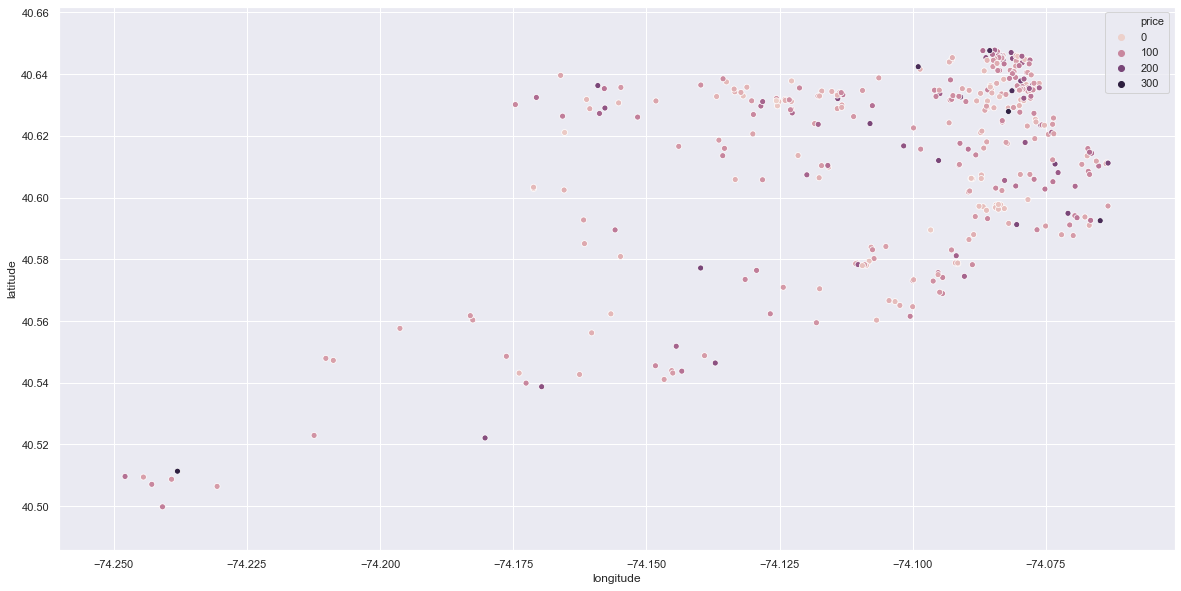

In [106]:
sns.scatterplot(sub_4.longitude, sub_4.latitude, hue=price_new)
plt.ioff()

# Bronx Price Map

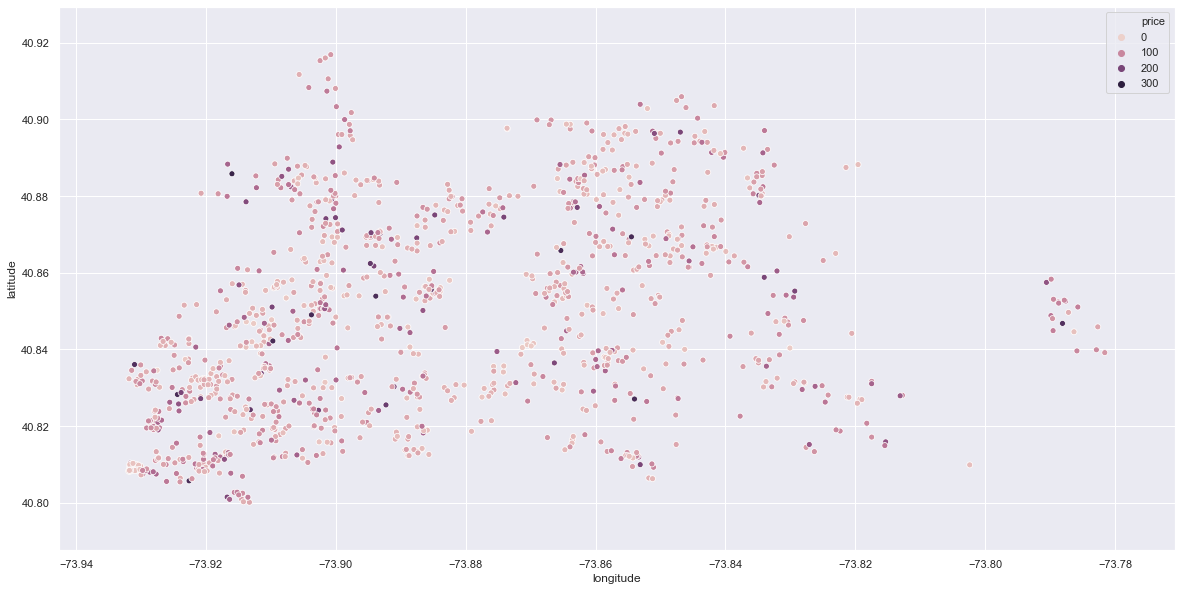

In [107]:
sns.scatterplot(sub_5.longitude, sub_5.latitude, hue=price_new)
plt.ioff()

# Which borough's availability over year is higher than others?

To see this, I used sns.boxplot and applied it on the map via sns.scatterplot.

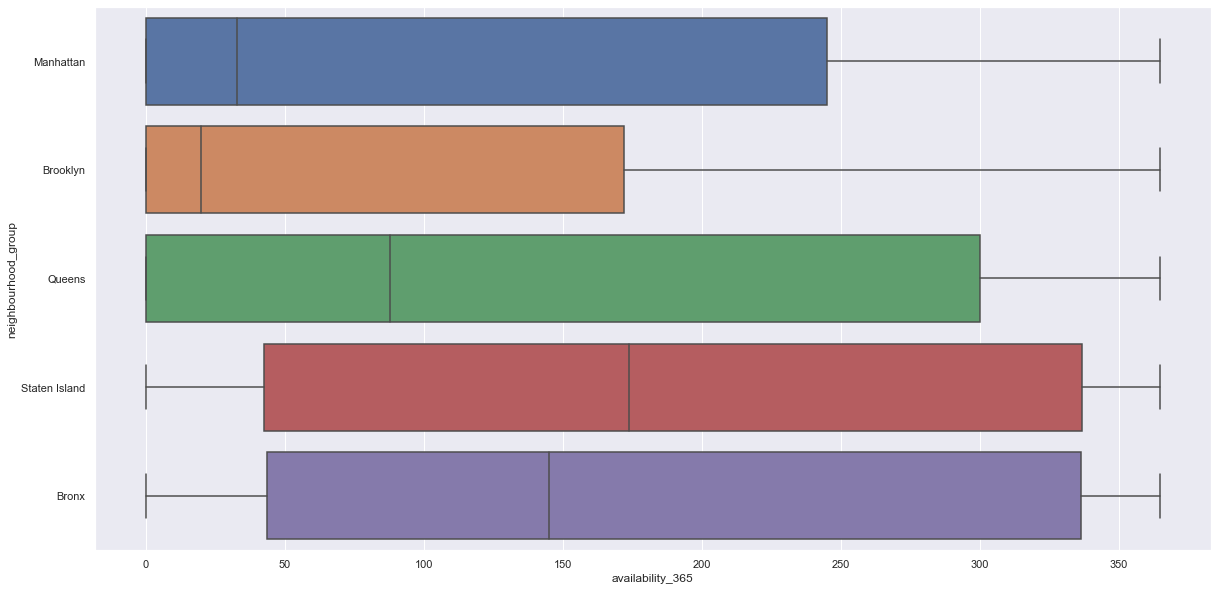

In [108]:
sns.boxplot(x=data.availability_365, y=data.neighbourhood_group)

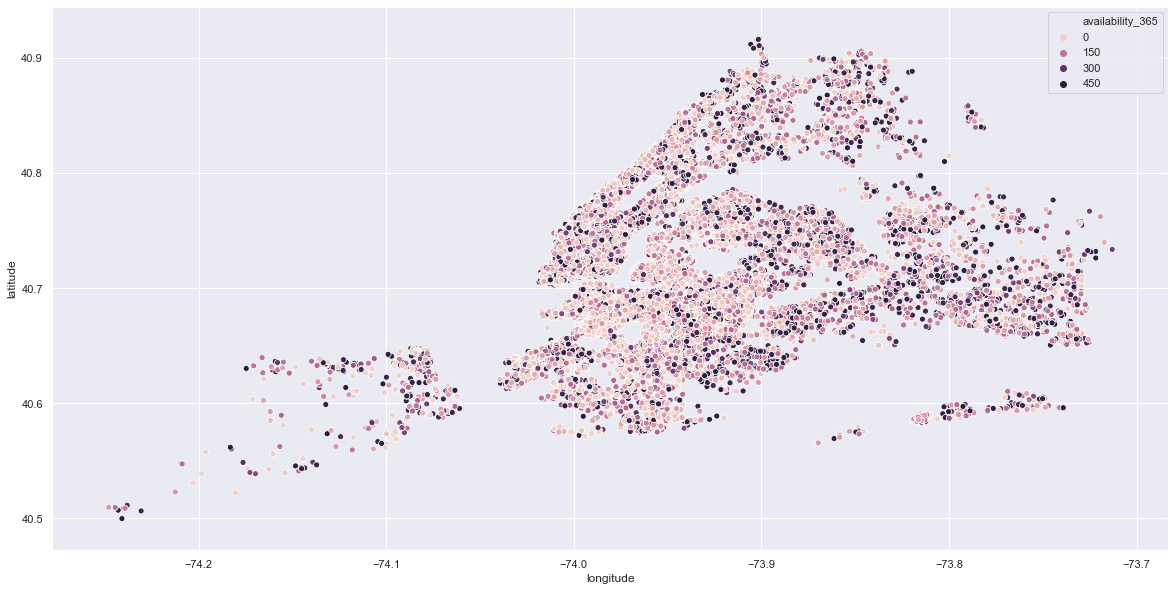

In [109]:
sns.scatterplot(data.longitude, data.latitude, hue=data.availability_365)
plt.ioff()

# The Results:

While Manhattan and Brooklyn listings are occupied in high numbers, Staten Island and Bronx listings are mostly available through the year.